In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import figure, format_plots
from scipy.spatial.distance import pdist, squareform

## V11

In [10]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

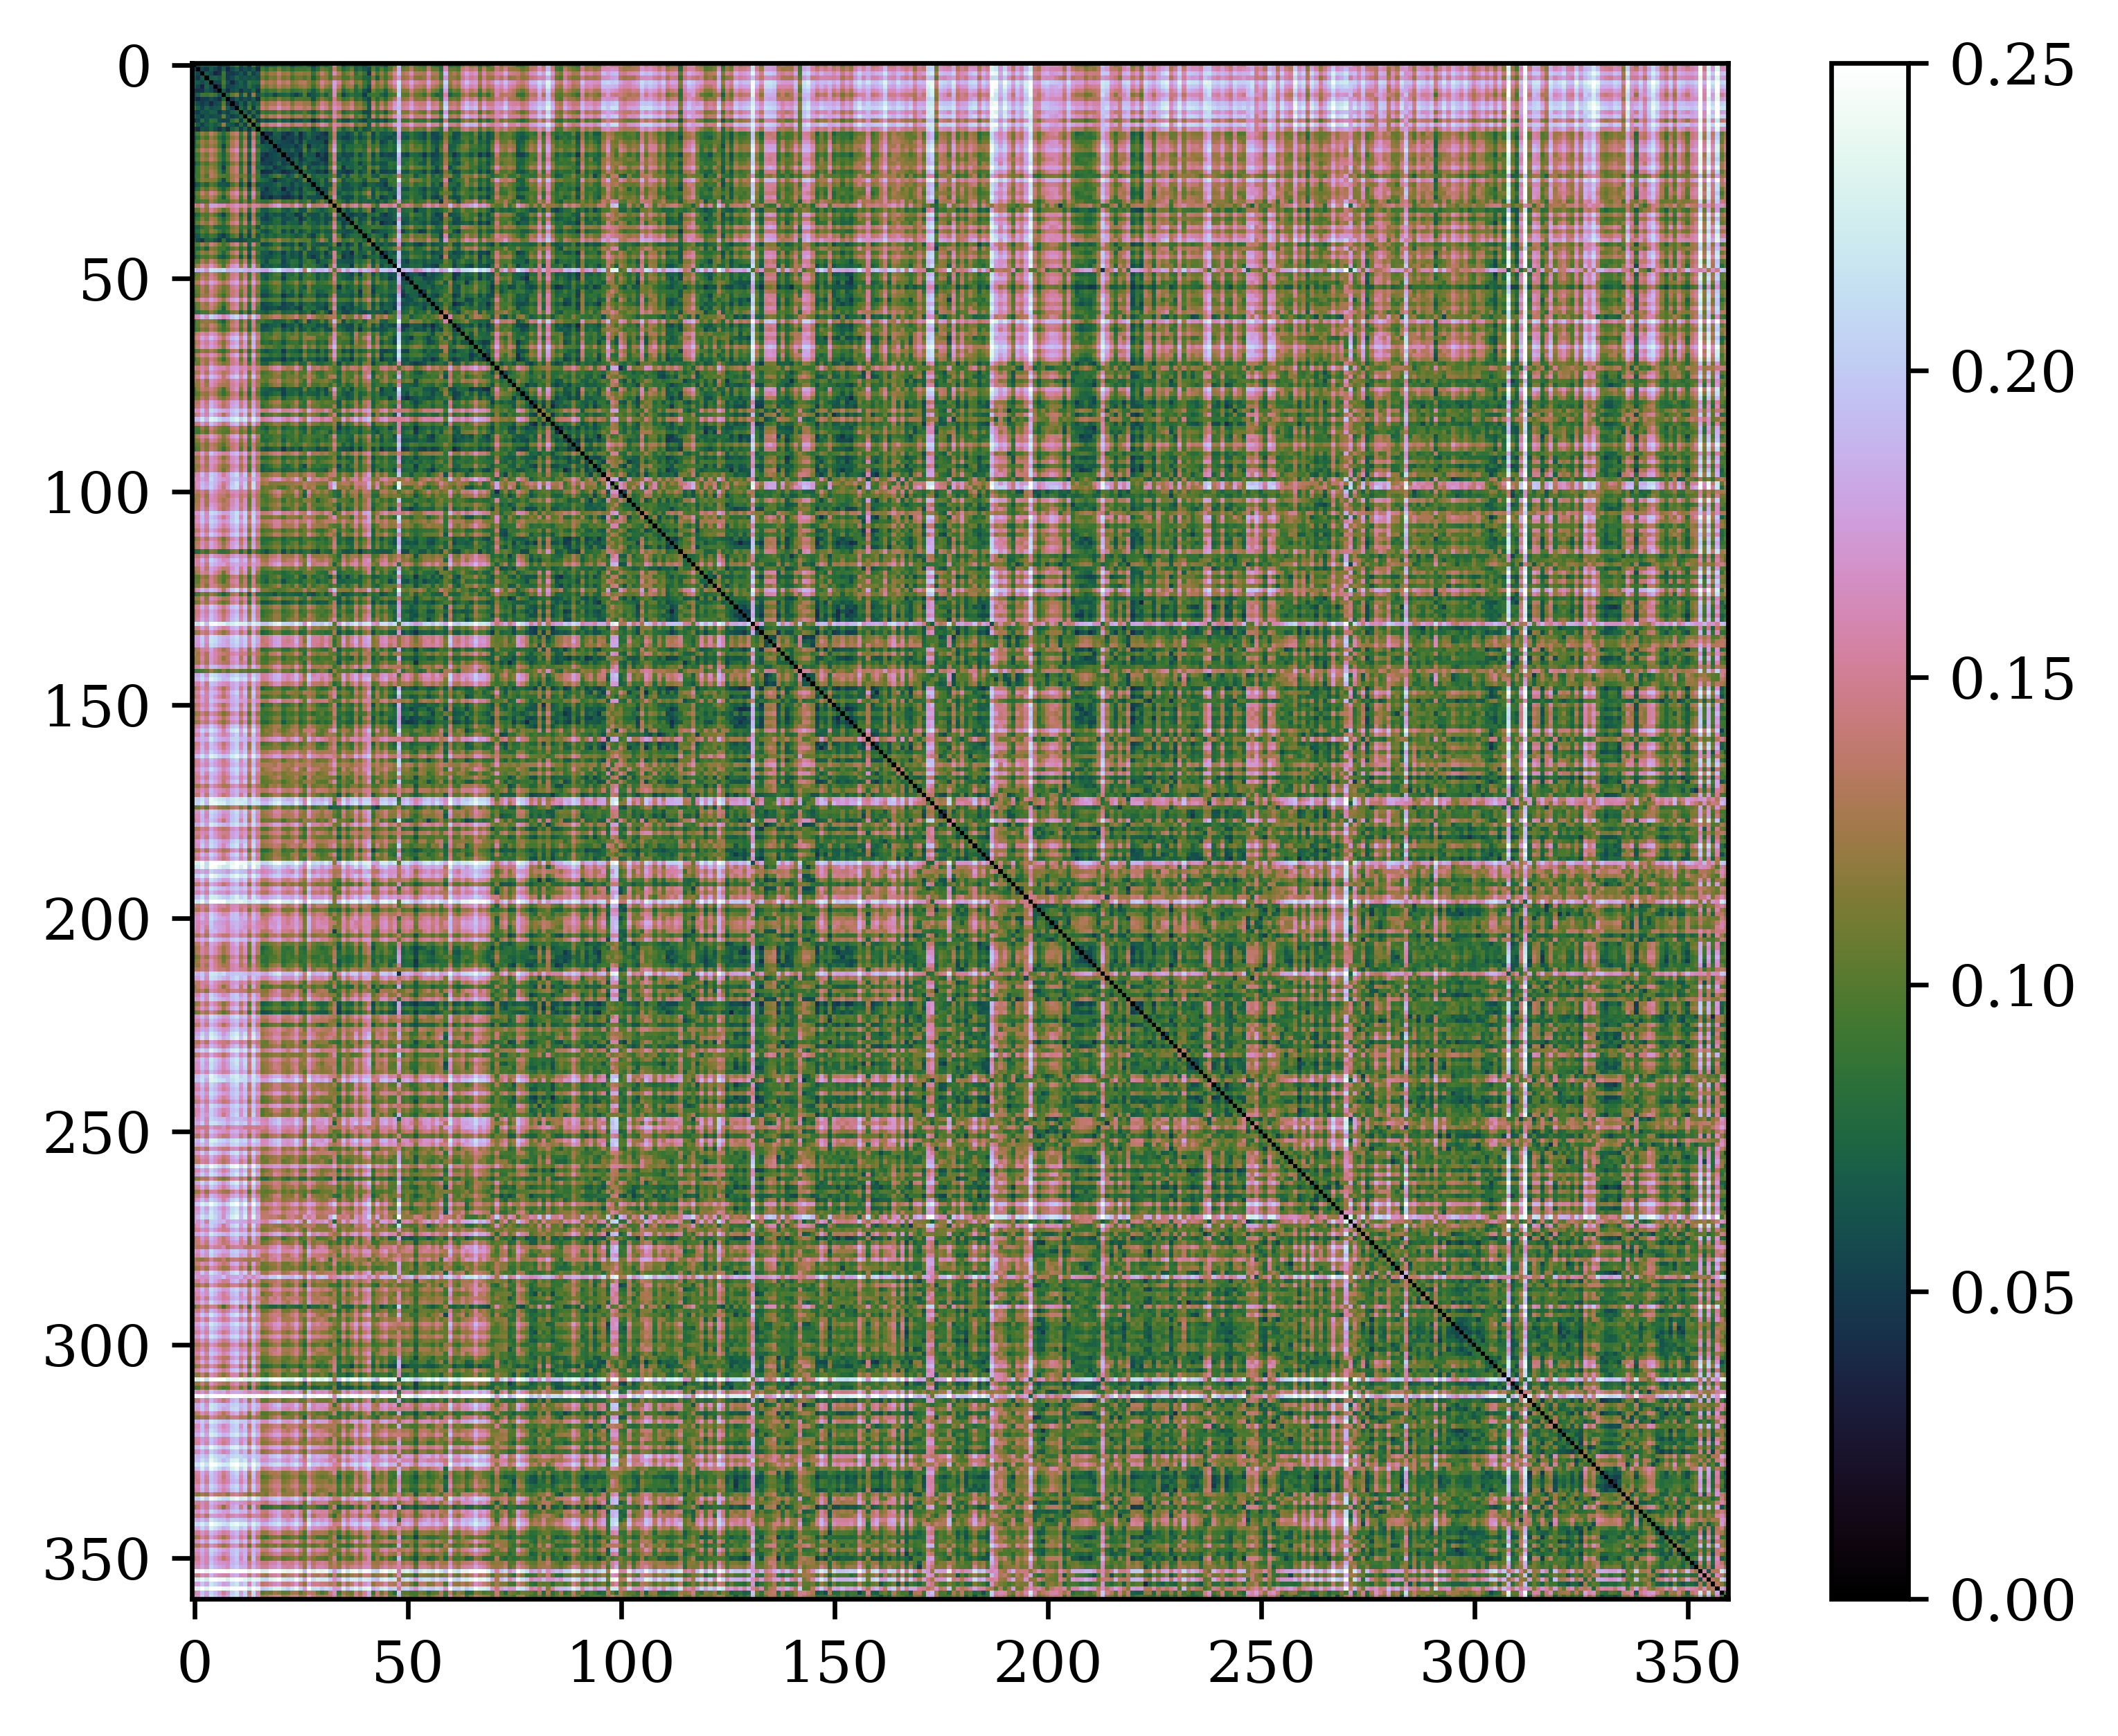

In [7]:
plt.imshow(squareform(pdist(df, metric='euclidean')), cmap='cubehelix', vmax=0.25)
plt.colorbar()

## V12

In [15]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

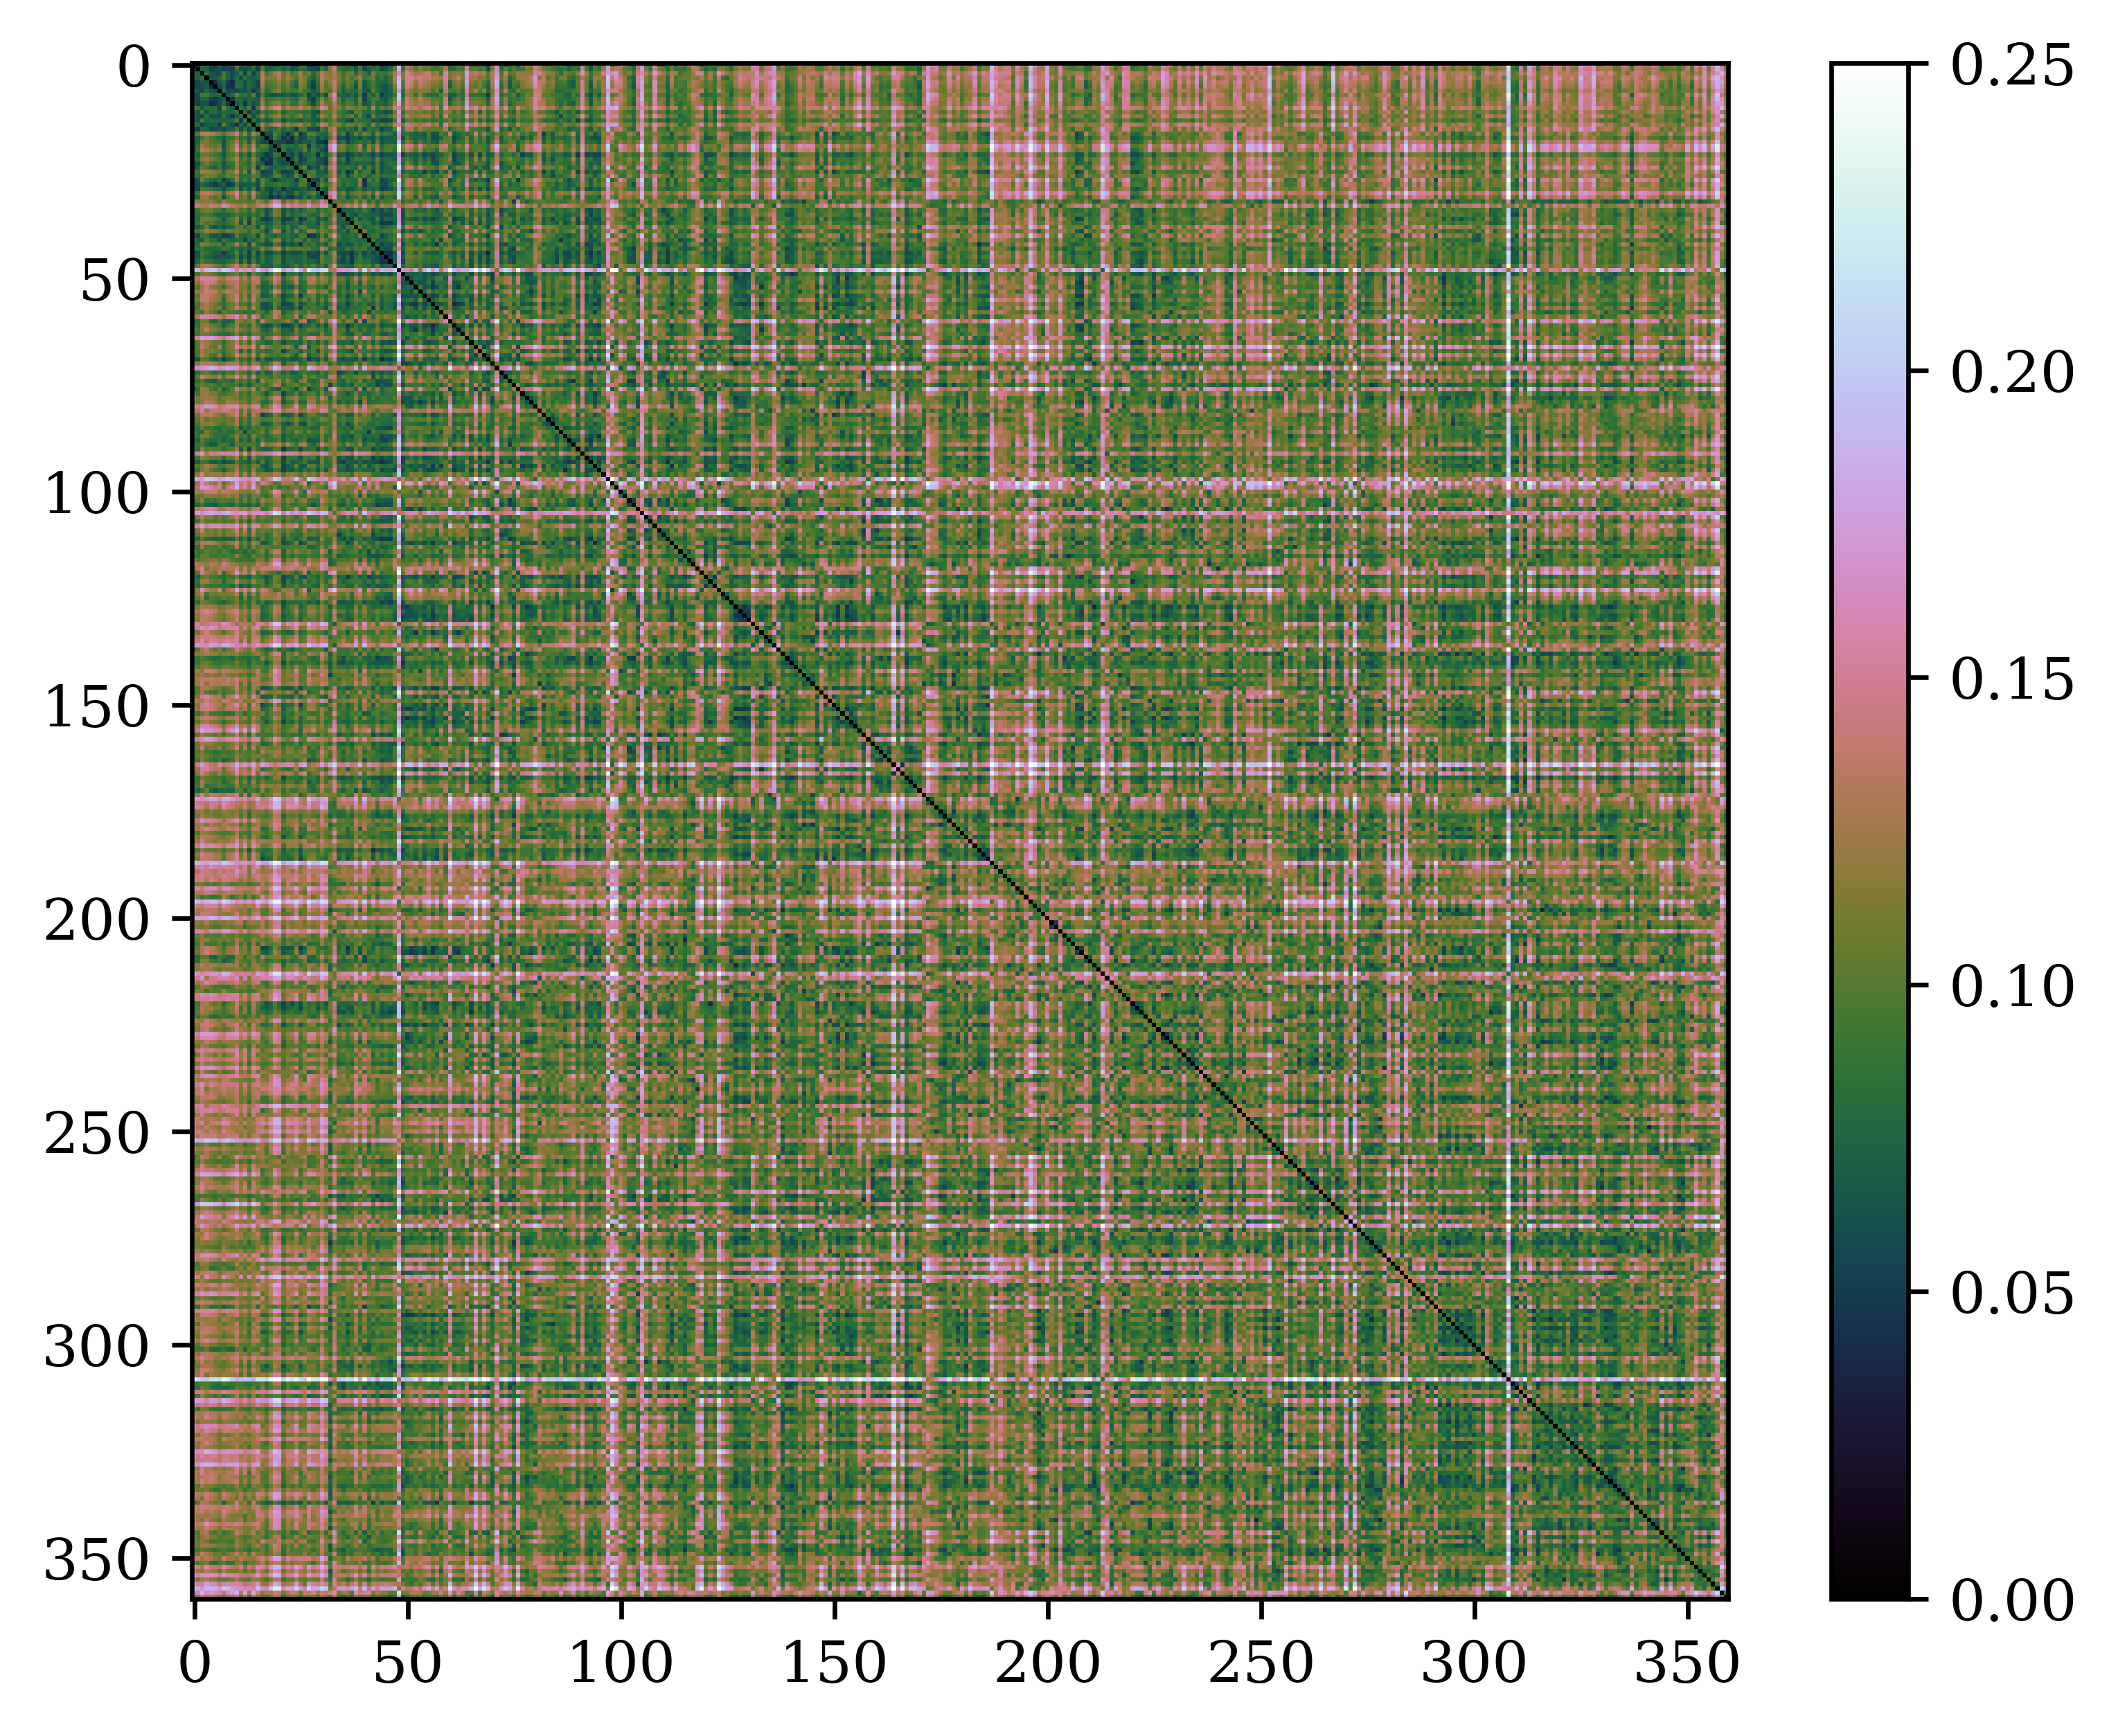

In [9]:
plt.imshow(squareform(pdist(df, metric='euclidean')), cmap='cubehelix', vmax=0.25)
plt.colorbar()

### Longtogeny

In [2]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')

df['age_binned'] = (df.index.get_level_values('age') * 7) // 30
df = df.set_index('age_binned', append=True)
df = df.groupby(['mouse', 'age_binned']).sample(n=1)
